# Solar Orbiter
This example demonstrates a ballistic model inspired by the solar orbiter mission.

In [1]:
# Pykep imports
from pykep.trajopt import mga_1dsm, launchers
from pykep.planet import jpl_lp
from pykep import epoch
from pykep.core import lambert_problem, propagate_lagrangian, fb_prop
from pykep import DAY2SEC, DAY2YEAR, AU, RAD2DEG, ic2par
from pykep.trajopt.gym._solar_orbiter import _solar_orbiter_udp

# Other imports
import numpy as np
from numpy.linalg import norm
from math import acos, asin, cos, exp, log, pi, sin
from copy import deepcopy
import pygmo
import time

In [2]:
# define search window
tmin = epoch(time.time() / (24*3600) - 30*365 -7 + 2/24 - 2*365)
tmax = epoch(time.time() / (24*3600) - 30*365 -7 + 2/24 + 2*365)

In [3]:
solar_orbiter = _solar_orbiter_udp([tmin, tmax])

In [4]:
# Include delta v, mass and sun distance constraints
prob = pygmo.unconstrain(pygmo.problem(solar_orbiter),method="weighted",weights=[1.0, 10.0, 100, 100])

In [5]:
# define problem and algorithm
pop = pygmo.population(prob=prob, size=50)
alg = pygmo.algorithm(pygmo.sade(memory=True,gen=1))

In [6]:
# run evolution
for i in range(3000):
    pop = alg.evolve(pop)
    print(i, pop.champion_f, solar_orbiter.fitness(pop.champion_x))

0 [36993.52546654] [1.5316191825175731, 34902.993847354715, array([208.9]), -0.28599168437055233, -0.19999999999999996]
1 [35117.52437042] [1.4490264358531855, 33027.07534398351, array([208.9]), -0.023047962181278747, -0.19999999999999996]
2 [31891.4385986] [1.5001415312591904, 29800.93845706768, array([208.9]), -0.43449328200700144, -0.19999999999999996]
3 [24992.71841724] [1.5410004153628287, 22902.17741682563, array([208.9]), -0.4179490304041048, -0.19999999999999996]
4 [24992.71841724] [1.5410004153628287, 22902.17741682563, array([208.9]), -0.4179490304041048, -0.19999999999999996]
5 [24992.71599939] [1.5385825671268776, 22902.17741682563, array([208.9]), -0.42078193661281305, -0.19999999999999996]
6 [24038.18860083] [1.5558566334964425, 21947.632744195915, array([208.9]), -0.021309283064102846, -0.19999999999999996]
7 [24038.18860083] [1.5558566334964425, 21947.632744195915, array([208.9]), -0.021309283064102846, -0.19999999999999996]
8 [18923.70547196] [1.5620933291405974, 16840

70 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
71 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
72 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
73 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
74 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
75 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
76 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
77 [4425.06956809] [1.4485386552154986, 2334.6210294309085, array([208.9]), -0.14929701450000255, -0.19999999999999996]
78 [4425.06956809] [1.4485386552154986, 

137 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
138 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
139 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
140 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
141 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
142 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
143 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.25491564974527814, -0.17941892636667456]
144 [2685.97204599] [1.435260340231611, 2684.5367856490375, array([-1751.20865438]), -0.254915649

203 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
204 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
205 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
206 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
207 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
208 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
209 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105952487]
210 [2314.31171173] [1.419591903350788, 2312.8921198226035, array([-896.6009622]), -0.27505202837071985, -0.1982363105

274 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
275 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
276 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
277 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
278 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
279 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
280 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.25290428524499686, -0.19999999999999996]
281 [1449.06601438] [1.3850972565480908, 1447.6809171247469, array([-1102.42583535]), -0.2

341 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
342 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
343 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
344 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
345 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
346 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
347 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.24560150114560075, -0.18870277570231164]
348 [1344.07886543] [1.3838962425093695, 1342.6949691904174, array([-1727.19903935]), -0.2

407 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
408 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
409 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
410 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
411 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
412 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
413 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.19999999999999996]
414 [785.35140225] [1.4036279145220834, 783.9477743357784, array([-1102.42583535]), -0.4428421327614134, -0.199

477 [785.332056] [1.3842816630628245, 783.9477743357784, array([-1102.42583535]), -0.4357021687274304, -0.19999999999999996]
478 [785.33205206] [1.384277727592858, 783.9477743357784, array([-1102.42583535]), -0.4357025164980307, -0.19999999999999996]
479 [785.33205206] [1.384277727592858, 783.9477743357784, array([-1102.42583535]), -0.4357025164980307, -0.19999999999999996]
480 [785.33205206] [1.384277727592858, 783.9477743357784, array([-1102.42583535]), -0.4357025164980307, -0.19999999999999996]
481 [785.33205206] [1.384277727592858, 783.9477743357784, array([-1102.42583535]), -0.4357025164980307, -0.19999999999999996]
482 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
483 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
484 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]

544 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
545 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
546 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
547 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
548 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
549 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
550 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
551 [785.3320461] [1.384271764268102, 783.9477743357784, array([-1102.42583535]), -0.435703043488733, -0.19999999999999996]
552 [785

613 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
614 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
615 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
616 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
617 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
618 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
619 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924, -0.19999999999999996]
620 [699.08478988] [1.3856941837618582, 697.6990957008729, array([-1102.42583535]), -0.43267067249166924

679 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
680 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
681 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
682 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
683 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
684 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
685 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.19999999999999996]
686 [570.0808782] [1.4169419730073944, 568.6639362281019, array([-1102.42583535]), -0.12840644838043763, -0.199

745 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
746 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
747 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
748 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
749 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
750 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
751 [220.85777654] [1.3991782683562373, 219.45859827599634, array([-1102.42583535]), -0.4431456012991122, -0.19999999999999996]
752 [220.85777654] [1.3991782675156834, 219.45859827599634, array([-1102.42583535]), -0.4431456012600986

814 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
815 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
816 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
817 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
818 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
819 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
820 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.44359248268137474, -0.19999999999999996]
821 [220.85495953] [1.3963612526183882, 219.45859827599634, array([-1102.42583535]), -0.443592482

882 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
883 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
884 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
885 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
886 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
887 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
888 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146, -0.19999999999999996]
889 [220.85495953] [1.3963612525914713, 219.45859827599634, array([-1102.42583535]), -0.4435924826807146

950 [220.85495953] [1.3963612525644795, 219.45859827599634, array([-1102.42583535]), -0.44359248268005236, -0.19999999999999996]
951 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.4435924826800173, -0.19999999999999996]
952 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.4435924826800173, -0.19999999999999996]
953 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.4435924826800173, -0.19999999999999996]
954 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.4435924826800173, -0.19999999999999996]
955 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.4435924826800173, -0.19999999999999996]
956 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.4435924826800173, -0.19999999999999996]
957 [220.85495953] [1.3963612525630433, 219.45859827599634, array([-1102.42583535]), -0.443592482680017

1019 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1020 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1021 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1022 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1023 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1024 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1025 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815, -0.19999999999999996]
1026 [220.85495953] [1.396361252561599, 219.45859827599634, array([-1102.42583535]), -0.4435924826799815

1089 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1090 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1091 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1092 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1093 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1094 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1095 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977, -0.19999999999999996]
1096 [220.85495953] [1.3963612525614109, 219.45859827599634, array([-1102.42583535]), -0.443592482679977

1157 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1158 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1159 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1160 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1161 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1162 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1163 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1164 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.44373512

1222 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1223 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1224 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1225 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1226 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1227 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1228 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.4437351260598893, -0.19999999999999996]
1229 [220.85031355] [1.3917152775688437, 219.45859827599634, array([-1102.42583535]), -0.44373512

1291 [107.53173257] [1.5264200719434164, 106.00531250145832, array([-1122.9852511]), -0.44168046994166643, -0.19999999999999996]
1292 [107.53173257] [1.5264200719434164, 106.00531250145832, array([-1122.9852511]), -0.44168046994166643, -0.19999999999999996]
1293 [107.53173257] [1.5264200719434164, 106.00531250145832, array([-1122.9852511]), -0.44168046994166643, -0.19999999999999996]
1294 [107.53173257] [1.5264200719434164, 106.00531250145832, array([-1122.9852511]), -0.44168046994166643, -0.19999999999999996]
1295 [107.44912947] [1.4438169665238312, 106.00531250145832, array([-1122.9852511]), -0.4357327104635894, -0.19999999999999996]
1296 [107.44912947] [1.4438169665238312, 106.00531250145832, array([-1122.9852511]), -0.4357327104635894, -0.19999999999999996]
1297 [107.44912947] [1.4438169665238312, 106.00531250145832, array([-1122.9852511]), -0.4357327104635894, -0.19999999999999996]
1298 [107.44912947] [1.4438169665238312, 106.00531250145832, array([-1122.9852511]), -0.435732710463

1360 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1361 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1362 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1363 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1364 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1365 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1366 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.19999999999999996]
1367 [107.41792365] [1.412611150189435, 106.00531250145832, array([-1122.9852511]), -0.4221740525185175, -0.199

1427 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1428 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1429 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1430 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1431 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1432 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1433 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999999996]
1434 [86.7159143] [1.4042541891477551, 85.3116601134725, array([-1219.10654621]), -0.43699554946144414, -0.19999999999

1494 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1495 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1496 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1497 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1498 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1499 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1500 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999999996]
1501 [68.43016535] [1.435315136385497, 66.99485021206146, array([-1132.13575789]), -0.4372487556430742, -0.19999999999

1561 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1562 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1563 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1564 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1565 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1566 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1567 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]
1568 [63.77274318] [1.398541300775371, 62.37420187980115, array([-1132.13575789]), -0.441422644574492, -0.19999999999999996]


1629 [55.34926538] [1.519596759540233, 53.829668621109704, array([-1210.23057656]), -0.4087349347117786, -0.19999999999999996]
1630 [55.34926538] [1.519596759540233, 53.829668621109704, array([-1210.23057656]), -0.4087349347117786, -0.19999999999999996]
1631 [55.34926538] [1.519596759540233, 53.829668621109704, array([-1210.23057656]), -0.4087349347117786, -0.19999999999999996]
1632 [55.34926538] [1.519596759540233, 53.829668621109704, array([-1210.23057656]), -0.4087349347117786, -0.19999999999999996]
1633 [55.34926538] [1.519596759540233, 53.829668621109704, array([-1210.23057656]), -0.4087349347117786, -0.19999999999999996]
1634 [55.34926538] [1.519596759540233, 53.829668621109704, array([-1210.23057656]), -0.4087349347117786, -0.19999999999999996]
1635 [55.34926538] [1.519596759540231, 53.829668621109704, array([-1210.23057656]), -0.4087349347117877, -0.19999999999999996]
1636 [55.34926538] [1.519596759540231, 53.829668621109704, array([-1210.23057656]), -0.4087349347117877, -0.199

1702 [8.56559836] [1.4728242123129351, 7.092774145609837, array([-1220.09152477]), -0.3757273620644198, -0.19999999999999996]
1703 [8.56559836] [1.4728242123129351, 7.092774145609837, array([-1220.09152477]), -0.3757273620644198, -0.19999999999999996]
1704 [8.56559836] [1.4728242123129351, 7.092774145609837, array([-1220.09152477]), -0.3757273620644198, -0.19999999999999996]
1705 [8.56559836] [1.4728242123129351, 7.092774145609837, array([-1220.09152477]), -0.3757273620644198, -0.19999999999999996]
1706 [8.56559836] [1.4728242123129351, 7.092774145609837, array([-1220.09152477]), -0.3757273620644198, -0.19999999999999996]
1707 [5.38353289] [1.5205745903297623, 3.8629583040419675, array([-1286.62406345]), -0.44379192744670803, -0.19999999999999996]
1708 [5.38353289] [1.5205745903297623, 3.8629583040419675, array([-1286.62406345]), -0.44379192744670803, -0.19999999999999996]
1709 [5.38353289] [1.5205745903297623, 3.8629583040419675, array([-1286.62406345]), -0.44379192744670803, -0.19999

1768 [3.73638426] [1.396752574387501, 2.3396316858725186, array([-1250.634644]), -0.4392653786054562, -0.19999999999999996]
1769 [3.73638426] [1.396752574387501, 2.3396316858725186, array([-1250.634644]), -0.4392653786054562, -0.19999999999999996]
1770 [3.73638426] [1.396752574387501, 2.3396316858725186, array([-1250.634644]), -0.4392653786054562, -0.19999999999999996]
1771 [3.73638426] [1.396752574387501, 2.3396316858725186, array([-1250.634644]), -0.4392653786054562, -0.19999999999999996]
1772 [3.73638426] [1.396752574387501, 2.3396316858725186, array([-1250.634644]), -0.4392653786054562, -0.19999999999999996]
1773 [3.44143368] [1.492817177072875, 1.9486165072503354, array([-1215.39007111]), -0.4109986386515433, -0.19999999999999996]
1774 [3.44143368] [1.492817177072875, 1.9486165072503354, array([-1215.39007111]), -0.4109986386515433, -0.19999999999999996]
1775 [3.44143368] [1.492817177072875, 1.9486165072503354, array([-1215.39007111]), -0.4109986386515433, -0.19999999999999996]
17

1836 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1837 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1838 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1839 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1840 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1841 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1842 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.19999999999999996]
1843 [1.39255707] [1.392557067341172, -1.8925797193551261, array([-1219.46994704]), -0.4438012038068352, -0.199

1906 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1907 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1908 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1909 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1910 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1911 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1912 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748, -0.19999999999999996]
1913 [1.39055818] [1.3905581791872867, -1.7740190152335344, array([-1287.12608966]), -0.4430765287663748

1971 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1972 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1973 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1974 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1975 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1976 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1977 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.4405740093781154, -0.19999999999999996]
1978 [1.38976737] [1.3897673659335608, -0.09352622776077624, array([-1299.36232089]), -0.44057400

2037 [1.38959142] [1.3895914236861469, -6.4590418749767196, array([-1307.79376733]), -0.44127304709964343, -0.19999999999999996]
2038 [1.38959142] [1.3895914236861469, -6.4590418749767196, array([-1307.79376733]), -0.44127304709964343, -0.19999999999999996]
2039 [1.38959142] [1.3895914236861469, -6.4590418749767196, array([-1307.79376733]), -0.44127304709964343, -0.19999999999999996]
2040 [1.38946076] [1.3894607563160075, -0.7678079157058164, array([-1304.14994871]), -0.4406163313247391, -0.19999999999999996]
2041 [1.38946076] [1.3894607563160075, -0.7678079157058164, array([-1304.14994871]), -0.4406163313247391, -0.19999999999999996]
2042 [1.38946076] [1.3894607563160075, -0.7678079157058164, array([-1304.14994871]), -0.4406163313247391, -0.19999999999999996]
2043 [1.38946076] [1.3894607563160075, -0.7678079157058164, array([-1304.14994871]), -0.4406163313247391, -0.19999999999999996]
2044 [1.38946076] [1.3894607563160075, -0.7678079157058164, array([-1304.14994871]), -0.4406163313247

2103 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2104 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2105 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2106 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2107 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2108 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2109 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.44084398136979375, -0.19999999999999996]
2110 [1.38903928] [1.3890392821924467, -2.7105386298690064, array([-1257.01241111]), -0.440843981

2167 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2168 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2169 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2170 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2171 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2172 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2173 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.44017223737817823, -0.19999999999999996]
2174 [1.38814002] [1.3881400160107957, -1.4226793879524848, array([-1247.92753689]), -0.440172237

2237 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2238 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2239 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2240 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2241 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2242 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2243 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573, -0.19999999999999996]
2244 [1.38746997] [1.3874699711720624, -1.4988053027582282, array([-1219.24370532]), -0.4378179593854573

2306 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2307 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2308 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2309 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2310 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2311 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2312 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091, -0.19999999999999996]
2313 [1.38706568] [1.3870656756882294, -0.8460159520291199, array([-1302.51437714]), -0.4379233985447091

2373 [1.38652259] [1.3865225910900754, -2.06405601172537, array([-1303.81718456]), -0.437438510303357, -0.19999999999999996]
2374 [1.38652259] [1.3865225910900754, -2.06405601172537, array([-1303.81718456]), -0.437438510303357, -0.19999999999999996]
2375 [1.38652259] [1.3865225910900754, -2.06405601172537, array([-1303.81718456]), -0.437438510303357, -0.19999999999999996]
2376 [1.38652259] [1.3865225910900754, -2.06405601172537, array([-1303.81718456]), -0.437438510303357, -0.19999999999999996]
2377 [1.38652259] [1.3865225910900754, -2.06405601172537, array([-1303.81718456]), -0.437438510303357, -0.19999999999999996]
2378 [1.38622594] [1.3862259397091459, -2.224295663477278, array([-1324.37312109]), -0.4363671958825417, -0.19999999999999996]
2379 [1.38622594] [1.3862259397091459, -2.224295663477278, array([-1324.37312109]), -0.4363671958825417, -0.19999999999999996]
2380 [1.38622594] [1.3862259397091459, -2.224295663477278, array([-1324.37312109]), -0.4363671958825417, -0.1999999999999

2440 [1.38573085] [1.385730845783517, -0.4261395903222365, array([-1309.47048522]), -0.4354371349315663, -0.19999999999999996]
2441 [1.38573085] [1.385730845783517, -0.4261395903222365, array([-1309.47048522]), -0.4354371349315663, -0.19999999999999996]
2442 [1.3857247] [1.3857246982528344, -0.0486372388959353, array([-1307.0335413]), -0.4357739352191723, -0.19999999999999996]
2443 [1.3857247] [1.3857246982528344, -0.0486372388959353, array([-1307.0335413]), -0.4357739352191723, -0.19999999999999996]
2444 [1.3857247] [1.3857246982528344, -0.0486372388959353, array([-1307.0335413]), -0.4357739352191723, -0.19999999999999996]
2445 [1.3857247] [1.3857246982528344, -0.0486372388959353, array([-1307.0335413]), -0.4357739352191723, -0.19999999999999996]
2446 [1.3857247] [1.3857246982528344, -0.0486372388959353, array([-1307.0335413]), -0.4357739352191723, -0.19999999999999996]
2447 [1.3857247] [1.3857246982528344, -0.0486372388959353, array([-1307.0335413]), -0.4357739352191723, -0.199999999

2507 [1.38519591] [1.3851959114792274, -0.005924414475884987, array([-1280.50281097]), -0.43474330869655553, -0.19999999999999996]
2508 [1.38519591] [1.3851959114792274, -0.005924414475884987, array([-1280.50281097]), -0.43474330869655553, -0.19999999999999996]
2509 [1.38519591] [1.3851959114792274, -0.005924414475884987, array([-1280.50281097]), -0.43474330869655553, -0.19999999999999996]
2510 [1.38507041] [1.3850704082408694, -1.1628940114469515, array([-1238.744159]), -0.43451605477150645, -0.19999999999999996]
2511 [1.38507041] [1.3850704082408694, -1.1628940114469515, array([-1238.744159]), -0.43451605477150645, -0.19999999999999996]
2512 [1.38507041] [1.3850704082408694, -1.1628940114469515, array([-1238.744159]), -0.43451605477150645, -0.19999999999999996]
2513 [1.38507041] [1.3850704082408694, -1.1628940114469515, array([-1238.744159]), -0.43451605477150645, -0.19999999999999996]
2514 [1.38507041] [1.385070408240869, -1.1628940114469515, array([-1238.744159]), -0.43451605477150

2574 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2575 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2576 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2577 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2578 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2579 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2580 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.19999999999999996]
2581 [1.38461079] [1.3846107914944825, -2.757901031970505, array([-1218.6494675]), -0.43290864432661813, -0.199

2643 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2644 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2645 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2646 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2647 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2648 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2649 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.43126341224094245, -0.19999999999999996]
2650 [1.38397751] [1.383977507023542, -0.20765923929593555, array([-1173.99795843]), -0.431263412

2714 [1.38359303] [1.3835930291517191, -0.4258246358112956, array([-1141.1483067]), -0.4298279668192223, -0.19999999999999996]
2715 [1.38359303] [1.3835930291517191, -0.4258246358112956, array([-1141.1483067]), -0.4298279668192223, -0.19999999999999996]
2716 [1.38359303] [1.3835930291517191, -0.4258246358112956, array([-1141.1483067]), -0.4298279668192223, -0.19999999999999996]
2717 [1.38359303] [1.3835930291517191, -0.4258246358112956, array([-1141.1483067]), -0.4298279668192223, -0.19999999999999996]
2718 [1.38355635] [1.3835563485009836, -0.058573053031977906, array([-1133.34163399]), -0.4295215803187785, -0.19999999999999996]
2719 [1.38355635] [1.3835563485009836, -0.058573053031977906, array([-1133.34163399]), -0.4295215803187785, -0.19999999999999996]
2720 [1.3835368] [1.3835367996983958, -2.7881170193659273, array([-1131.78489771]), -0.42984615732305875, -0.19999999999999996]
2721 [1.3835368] [1.3835367996983958, -2.7881170193659273, array([-1131.78489771]), -0.42984615732305875

2780 [1.38310922] [1.383109223465635, -4.3729350508310745, array([-1079.91267123]), -0.427562953139783, -0.19999999999999996]
2781 [1.38310922] [1.383109223465635, -4.3729350508310745, array([-1079.91267123]), -0.427562953139783, -0.19999999999999996]
2782 [1.38310922] [1.383109223465635, -4.3729350508310745, array([-1079.91267123]), -0.427562953139783, -0.19999999999999996]
2783 [1.3830765] [1.3830765014959348, -3.0628078666759393, array([-1076.06650266]), -0.4271029805972659, -0.19999999999999996]
2784 [1.3830765] [1.3830765014959348, -3.0628078666759393, array([-1076.06650266]), -0.4271029805972659, -0.19999999999999996]
2785 [1.3830765] [1.3830765014959348, -3.0628078666759393, array([-1076.06650266]), -0.4271029805972659, -0.19999999999999996]
2786 [1.38304872] [1.3830487209161137, -3.3037994470023477, array([-1074.81684829]), -0.4274319719771962, -0.19999999999999996]
2787 [1.38304199] [1.383041994189507, -0.917334155561548, array([-1083.13730385]), -0.4278992919421516, -0.199999

2848 [1.38244414] [1.3824441442933058, -5.212397300407247, array([-989.98268825]), -0.42606666655219594, -0.19999999999999996]
2849 [1.38244414] [1.3824441442933058, -5.212397300407247, array([-989.98268825]), -0.42606666655219594, -0.19999999999999996]
2850 [1.38244414] [1.3824441442933058, -5.212397300407247, array([-989.98268825]), -0.42606666655219594, -0.19999999999999996]
2851 [1.38244414] [1.3824441442933058, -5.212397300407247, array([-989.98268825]), -0.42606666655219594, -0.19999999999999996]
2852 [1.3824326] [1.3824326033988839, -3.0505445984526887, array([-996.91079725]), -0.4250334366756593, -0.19999999999999996]
2853 [1.3824326] [1.3824326033988839, -3.0505445984526887, array([-996.91079725]), -0.4250334366756593, -0.19999999999999996]
2854 [1.3824326] [1.3824326033988839, -3.0505445984526887, array([-996.91079725]), -0.4250334366756593, -0.19999999999999996]
2855 [1.3824326] [1.3824326033988839, -3.0505445984526887, array([-996.91079725]), -0.4250334366756593, -0.1999999

2913 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2914 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2915 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2916 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2917 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2918 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2919 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.19999999999999996]
2920 [1.38209759] [1.3820975866723308, -0.8067055903547953, array([-938.02030778]), -0.4250102492846989, -0.199

2984 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2985 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2986 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2987 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2988 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2989 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2990 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.19999999999999996]
2991 [1.38183411] [1.3818341051973149, -0.534794749167304, array([-898.13730803]), -0.42475528969608334, -0.199

In [7]:
pop.champion_x

array([ 7.33108120e+03,  2.25876208e+02,  4.16960898e+02,  7.13426360e+01,
        4.08556582e+02, -1.00640060e-01,  1.05783212e+00])

In [8]:
solar_orbiter.fitness(pop.champion_x)

[1.3818341051973149,
 -0.534794749167304,
 array([-898.13730803]),
 -0.42475528969608334,
 -0.19999999999999996]

In [9]:
# start date
epoch(pop.champion_x[0])

2020-Jan-27 01:56:55.710580

In [10]:
# Inspect best result
solar_orbiter.pretty(pop.champion_x)

Multiple Gravity Assist (MGA) problem: 
Planet sequence:  ['earth', 'venus', 'venus', 'earth', 'venus']
Departure:  earth
	Epoch:  7331.08120035393  [mjd2000]
	Spacecraft velocity:  (-24994.600507880972, -11903.012134333745, 795.7079973399326) [m/s]
	Launch velocity:  [-502.33448372536805, 5844.49590736561, 794.8983931708563] [m/s]
Fly-by:  venus
	Epoch:  7556.957408252354  [mjd2000]
	DV:  1.7536099402186665 [m/s]
Fly-by:  venus
	Epoch:  7973.918306407181  [mjd2000]
	DV:  6.447237890074575 [m/s]
Fly-by:  earth
	Epoch:  8045.260942435919  [mjd2000]
	DV:  1.2643574205394543 [m/s]
Final Fly-by:  venus
	Epoch:  8453.817524116423  [mjd2000]
	Spacecraft velocity:  (-24956.435865613104, 32617.15805439597, 432.2549297477374) [m/s]
	Beta:  -0.10064006048226347
	r_p:  1.0578321216128246
Resulting Solar orbit:
Perihelion:  0.7047552896960834  AU
Aphelion:  1.2807069908770066  AU
Inclination:  10.826737784957238  degrees
Time of flights:  [225.8762079  416.96089815  71.34263603 408.55658168] [days

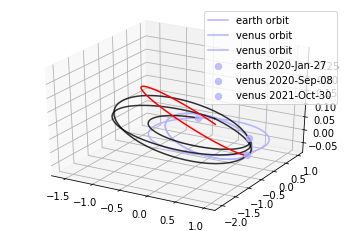

In [11]:
# Plot best result
solar_orbiter.plot(pop.champion_x)